# General EDA

In [133]:
import pandas as pd

In [134]:
df15 = pd.read_csv("../../Data/raw/2015.csv", delimiter=',')
df16 = pd.read_csv("../../Data/raw/2016.csv", delimiter=',')
df17 = pd.read_csv("../../Data/raw/2017.csv", delimiter=',')
df18 = pd.read_csv("../../Data/raw/2018.csv", delimiter=',')
df19 = pd.read_csv("../../Data/raw/2019.csv", delimiter=',')

### 2015

In [135]:
df15.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


### 2016

In [136]:
df16.head(1)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


### 2017

In [137]:
df17.head(1)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


### 2018

In [138]:
df18.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


### 2019

In [139]:
df19.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


Comparten información sobre:

- Pais/Región
- Rank (Happpiness?)
- Happiness score (O simplemente score al parecer) [Debemos predecir esta info]
- GDP per capita (Economia)
- Life Expectancy (Health)
- Government Corruption (Trust)
- Generosity
- Freedom

## Unamos los datasets:

In [140]:
df15.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [141]:
df19.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


In [142]:
# Crear un diccionario de mapeo común para estandarizar nombres de columnas
mapping = {
    'Country or region': 'Country',
    'Happiness Rank': 'Rank',
    'Happiness.Rank': 'Rank',
    'Overall rank': 'Rank',
    'Economy (GDP per Capita)': 'GDP per Capita',
    'GDP per capita': 'GDP per Capita',
    'Economy..GDP.per.Capita.': 'GDP per Capita',
    'Health (Life Expectancy)': 'Life Expectancy',
    'Health..Life.Expectancy.': 'Life Expectancy',
    'Healthy life expectancy': 'Life Expectancy',
    'Trust (Government Corruption)': 'Government Corruption',
    'Trust..Government.Corruption.': 'Government Corruption',
    'Perceptions of corruption': 'Government Corruption',
    'Happiness.Score': 'Happiness Score',
    'Score': 'Happiness Score',
    'Freedom to make life choices': 'Freedom'
}

# Crear una lista de los DataFrames y los años correspondientes
dataframes = [(df15, 2015), (df16, 2016), (df17, 2017), (df18, 2018), (df19, 2019)]

# Renombrar columnas y agregar columna Year
for df, year in dataframes:
    df.rename(columns=mapping, inplace=True)
    df['Year'] = year


In [ ]:
# Crear un conjunto de columnas para cada DataFrame
columns_15 = set(df15.columns)
columns_16 = set(df16.columns)
columns_17 = set(df17.columns)
columns_18 = set(df18.columns)
columns_19 = set(df19.columns)

# Crear una lista de todos los conjuntos de columnas
all_columns = [columns_15, columns_16, columns_17, columns_18, columns_19]

# Calcular las columnas compartidas por todos los DataFrames (intersección)
shared_columns = set.intersection(*all_columns)

Columnas compartidas en todos los datasets:
{'Government Corruption', 'Year', 'Happiness Score', 'Rank', 'Life Expectancy', 'Country', 'Generosity', 'Freedom', 'GDP per Capita'}

Columnas que no están en todos los datasets:
{'Upper Confidence Interval', 'Social support', 'Standard Error', 'Family', 'Dystopia Residual', 'Whisker.high', 'Dystopia.Residual', 'Lower Confidence Interval', 'Region', 'Whisker.low'}


In [144]:
df16.head(1)

,Country,Region,Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,GDP per Capita,Family,Life Expectancy,Freedom,Government Corruption,Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016


## Para cuando los unas; la matriz de correlación:

### Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df[['price', 'base_price', 'sold_quantity', 'available_quantity', 'accepts_mercadopago', 'local_pick_up', 'free_shipping', 'condition_dummy']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [145]:
shared_columns = list(shared_columns)
# Seleccionar únicamente las columnas compartidas en cada DataFrame
df15_common = df15[shared_columns]
df16_common = df16[shared_columns]
df17_common = df17[shared_columns]
df18_common = df18[shared_columns]
df19_common = df19[shared_columns]

# Concatenar los DataFrames usando solo las columnas compartidas
merged_df = pd.concat([df15_common, df16_common, df17_common, df18_common, df19_common], axis=0)

# Reiniciar el índice del DataFrame final
merged_df.reset_index(drop=True, inplace=True)

In [146]:
merged_df = merged_df.dropna()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781 entries, 0 to 781
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Government Corruption  781 non-null    float64
 1   Year                   781 non-null    int64  
 2   Happiness Score        781 non-null    float64
 3   Rank                   781 non-null    int64  
 4   Life Expectancy        781 non-null    float64
 5   Country                781 non-null    object 
 6   Generosity             781 non-null    float64
 7   Freedom                781 non-null    float64
 8   GDP per Capita         781 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 61.0+ KB


In [147]:
merged_df.head(1)

,Government Corruption,Year,Happiness Score,Rank,Life Expectancy,Country,Generosity,Freedom,GDP per Capita
0,0.41978,2015,7.587,1,0.94143,Switzerland,0.29678,0.66557,1.39651


In [148]:
merged_df.dtypes

Government Corruption    float64
Year                       int64
Happiness Score          float64
Rank                       int64
Life Expectancy          float64
Country                   object
Generosity               float64
Freedom                  float64
GDP per Capita           float64
dtype: object

In [149]:
# Crear variables dummy para la columna 'Year' en el dataset merged_df
merged_df_with_dummies = pd.get_dummies(merged_df, columns=['Year'], drop_first=False)

# Ver el resultado
merged_df_with_dummies.head()

,Government Corruption,Happiness Score,Rank,Life Expectancy,Country,Generosity,Freedom,GDP per Capita,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
0,0.41978,7.587,1,0.94143,Switzerland,0.29678,0.66557,1.39651,True,False,False,False,False
1,0.14145,7.561,2,0.94784,Iceland,0.43630,0.62877,1.30232,True,False,False,False,False
2,0.48357,7.527,3,0.87464,Denmark,0.34139,0.64938,1.32548,True,False,False,False,False
3,0.36503,7.522,4,0.88521,Norway,0.34699,0.66973,1.45900,True,False,False,False,False
4,0.32957,7.427,5,0.90563,Canada,0.45811,0.63297,1.32629,True,False,False,False,False


In [150]:
merged_df_with_dummies['Country'].value_counts()

Country
Switzerland                 5
Iceland                     5
Denmark                     5
Norway                      5
Canada                      5
                           ..
Puerto Rico                 1
Hong Kong S.A.R., China     1
Taiwan Province of China    1
North Macedonia             1
Gambia                      1
Name: count, Length: 170, dtype: int64

In [151]:
import pandas as pd

# Crear el mapeo de regiones como antes
regions = {
    'Europe': ['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Finland', 'Netherlands', 'Sweden', 'Austria', 
               'Luxembourg', 'Ireland', 'Belgium', 'United Kingdom', 'Germany', 'France', 'Czech Republic', 
               'Italy', 'Poland', 'Russia', 'Portugal', 'Spain', 'Croatia', 'Slovenia', 'Romania', 'Serbia', 
               'Ukraine', 'Estonia', 'Latvia', 'Lithuania', 'Albania', 'Bosnia and Herzegovina', 'Moldova', 
               'Kosovo', 'Cyprus', 'Greece', 'Hungary', 'Bulgaria', 'Slovakia', 'Norway', 'Malta', 'Finland'],
    
    'Americas': ['United States', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 
                 'Uruguay', 'Venezuela', 'Ecuador', 'Panama', 'Costa Rica', 'Puerto Rico', 'Jamaica', 'Haiti', 
                 'Belize', 'Trinidad and Tobago', 'Guyana', 'Barbados'],
    
    'Asia': ['Israel', 'Singapore', 'Japan', 'South Korea', 'China', 'India', 'Indonesia', 'Vietnam', 'Thailand', 
             'Malaysia', 'Philippines', 'Bangladesh', 'Myanmar', 'Sri Lanka', 'Nepal', 'Taiwan', 'Mongolia', 
             'Kazakhstan', 'Kyrgyzstan', 'Uzbekistan', 'Turkmenistan', 'Tajikistan'],
    
    'Africa': ['South Africa', 'Nigeria', 'Kenya', 'Egypt', 'Ghana', 'Uganda', 'Tanzania', 'Zimbabwe', 'Liberia', 
               'Algeria', 'Morocco', 'Angola', 'Mozambique', 'Mauritius', 'Malawi', 'Zambia', 'Cameroon', 'Senegal', 
               'Ivory Coast', 'Mali', 'Burkina Faso', 'Rwanda', 'Benin', 'Togo', 'Mauritania', 'Ethiopia', 'Somalia', 
               'Sierra Leone', 'Sudan', 'Chad', 'Congo', 'Gabon', 'Togo', 'Botswana', 'Tunisia'],
    
    'Oceania': ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Samoa', 'Vanuatu'],
    
    'Middle East': ['United Arab Emirates', 'Oman', 'Qatar', 'Saudi Arabia', 'Bahrain', 'Lebanon', 'Jordan', 
                    'Kuwait', 'Iraq', 'Syria', 'Palestinian Territories', 'Yemen']
}

# Crear un diccionario inverso para mapear países a sus regiones
country_to_region = {country: region for region, countries in regions.items() for country in countries}

# Asignar las regiones en el DataFrame usando map
merged_df_with_dummies['Region'] = merged_df_with_dummies['Country'].map(country_to_region)

# Generar las variables dummy para la columna 'Region'
region_dummies = pd.get_dummies(merged_df_with_dummies['Region'], prefix='Region')

# Agregar las columnas dummy al DataFrame original
merged_df_with_dummies = pd.concat([merged_df_with_dummies, region_dummies], axis=1)

# Mostrar los primeros valores del DataFrame con las dummies
merged_df_with_dummies.head()


,Government Corruption,Happiness Score,Rank,Life Expectancy,Country,Generosity,Freedom,GDP per Capita,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Region,Region_Africa,Region_Americas,Region_Asia,Region_Europe,Region_Middle East,Region_Oceania
0,0.41978,7.587,1,0.94143,Switzerland,0.29678,0.66557,1.39651,True,False,False,False,False,Europe,False,False,False,True,False,False
1,0.14145,7.561,2,0.94784,Iceland,0.43630,0.62877,1.30232,True,False,False,False,False,Europe,False,False,False,True,False,False
2,0.48357,7.527,3,0.87464,Denmark,0.34139,0.64938,1.32548,True,False,False,False,False,Europe,False,False,False,True,False,False
3,0.36503,7.522,4,0.88521,Norway,0.34699,0.66973,1.45900,True,False,False,False,False,Europe,False,False,False,True,False,False
4,0.32957,7.427,5,0.90563,Canada,0.45811,0.63297,1.32629,True,False,False,False,False,Americas,False,True,False,False,False,False


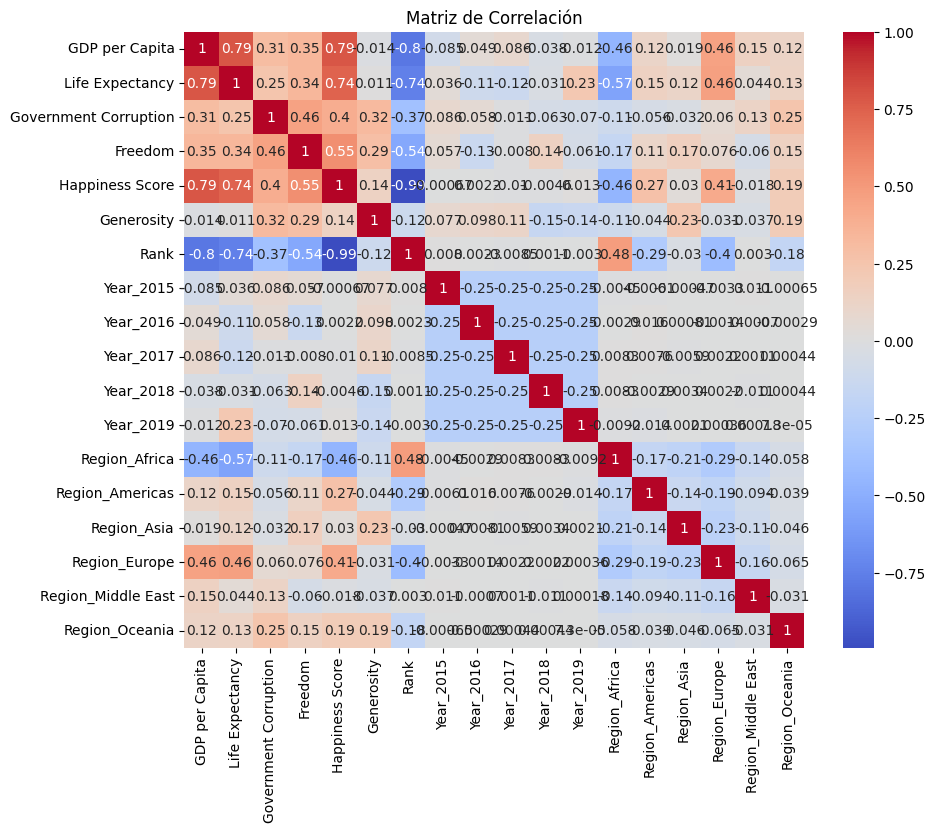

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar columnas numéricas o booleanas relevantes para la correlación en el DataFrame merged_df
columns_to_correlate = ['GDP per Capita', 'Life Expectancy', 'Government Corruption', 
                        'Freedom', 'Happiness Score', 'Generosity', 'Rank', 'Year_2015', 'Year_2016','Year_2017','Year_2018','Year_2019',
                        'Region_Africa', 'Region_Americas',	'Region_Asia','Region_Europe','Region_Middle East',	'Region_Oceania']

# Crear y visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df_with_dummies[columns_to_correlate].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [157]:
columns_to_keep = ['GDP per Capita', 'Generosity','Government Corruption', 'Life Expectancy', 'Freedom', 'Year_2015', 'Year_2016','Year_2017','Year_2018','Year_2019',
                    'Region_Africa', 'Region_Americas',	'Region_Asia','Region_Europe','Region_Middle East',	'Region_Oceania']
features = merged_df_with_dummies[columns_to_keep]

merged_df.to_csv("../../Data/clean/merged.csv", index=False)
features.to_csv("../../Data/clean/features.csv", index=False)

## Modelos

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleccionar columnas de características (excluyendo 'Rank') y la columna objetivo
X = merged_df_with_dummies[['GDP per Capita', 'Generosity','Government Corruption', 'Life Expectancy', 'Freedom', 'Year_2015', 'Year_2016','Year_2017','Year_2018','Year_2019',
                                'Region_Africa', 'Region_Americas',	'Region_Asia','Region_Europe','Region_Middle East',	'Region_Oceania']]
y = merged_df_with_dummies['Happiness Score']

# Dividir en conjunto de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [161]:
import joblib
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear instancias de los modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "SVR": SVR(kernel='rbf', C=1, epsilon=0.1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=100, random_state=42),
}

# Diccionario para almacenar resultados
results = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}

# Mostrar resultados
for model_name, metrics in results.items():
    print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 Score = {metrics['R2 Score']:.2f}")

# Elegir el modelo a guardar basado en alguna métrica
# Por ejemplo, guardar el modelo con el mayor R2 Score
best_model_name = max(results, key=lambda x: results[x]['R2 Score'])
best_model = models[best_model_name]

# Guardar el mejor modelo
joblib.dump(best_model, f"../{best_model_name.lower().replace(' ', '_')}_model.pkl")
print(f"\nModelo elegido para guardar: {best_model_name}")


Linear Regression: MSE = 0.29, R2 Score = 0.76
Random Forest: MSE = 0.21, R2 Score = 0.83
Ridge Regression: MSE = 0.29, R2 Score = 0.76
SVR: MSE = 0.30, R2 Score = 0.76
Gradient Boosting: MSE = 0.23, R2 Score = 0.81
AdaBoost Regressor: MSE = 0.29, R2 Score = 0.77

Modelo elegido para guardar: Random Forest
